In [ ]:
!pip install gensim numpy==1.25.0

In [ ]:
!pip install scikit-learn matplotlib

In [ ]:
!pip install transformers

In [ ]:
!pip install langchain cohere langchain_community

In [ ]:
!pip install wikipedia

prg1

In [ ]:
from gensim.downloader import load
model=load('glove-wiki-gigaword-100')
def wrd():
    result=model.most_similar(positive=['king','woman'],negative=['man'],topn=1)
    print("\n King-man+woman = ",result[0][0])
    print("\n Similarity = ",result[0][1])

    result=model.most_similar(positive=['paris','italy'],negative=['france'],topn=1)
    print("\n Paris- France+Italy = ",result[0][0])
    print("\n Similarity = ",result[0][1])

    result=model.most_similar(positive=['programming'],topn=5)
    print("Top 5 most similar words to programming:\n")
    for word,similarity in result:
        print(word,similarity)
wrd()


 King-man+woman =  queen

 Similarity =  0.7698540687561035

 Paris- France+Italy =  rome

 Similarity =  0.8189547061920166
Top 5 most similar words to programming:

network 0.712138295173645
format 0.7065715789794922
broadcast 0.7059512734413147
channels 0.691154956817627
programs 0.6877143979072571


prg2

Loading model..
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model downloaded
Top 10 similar word to computer:
computers : 0.7979
laptop : 0.6640
laptop_computer : 0.6549
Computer : 0.6473
com_puter : 0.6082



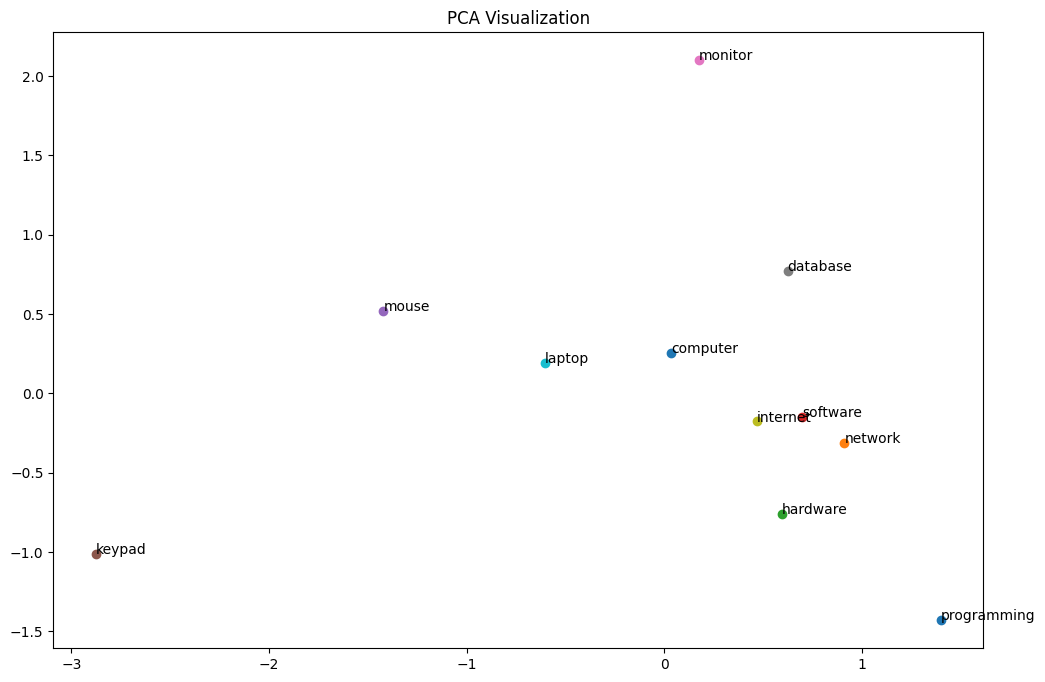

In [ ]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Loading model..")
model = api.load("word2vec-google-news-300")
print("Model downloaded")

words = ['computer', 'network', 'hardware', 'software', 'mouse', 'keypad', 'monitor', 'database', 'internet', 'laptop', 'programming']
vectors = [model[word] for word in words]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

input_word = 'computer'
print(f"Top 10 similar word to {input_word}:")
for word, similarity in model.most_similar(input_word, topn=5):
    print(f"{word} : {similarity:.4f}")
print()

plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("PCA Visualization")
plt.show()

prg3

Similar to 'treatment':
  doctor: 0.17
  vaccine: 0.17
  fatigue: 0.11
  antibiotics: 0.11
  therapy: 0.08


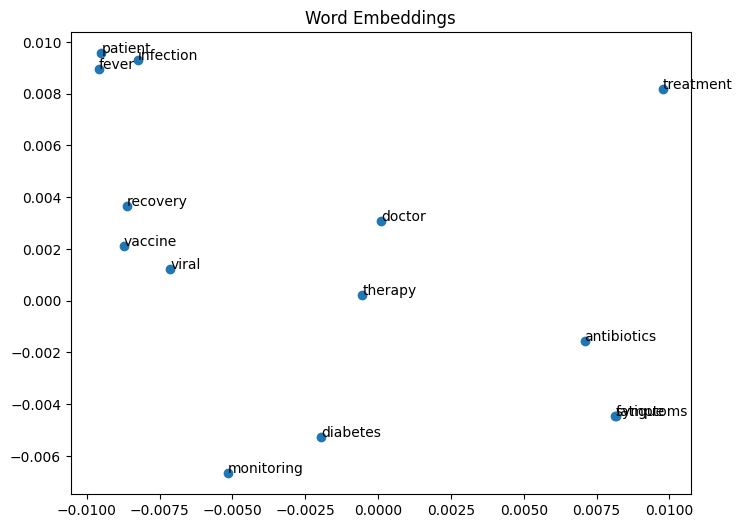

In [ ]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

texts = [
    "patient diabetes treatment",
    "antibiotics therapy monitoring",
    "fever fatigue symptoms",
    "vaccine viral infection",
    "doctor therapy recovery"
]

model = Word2Vec([text.split() for text in texts], min_count=1)

print("Similar to 'treatment':")
for word, score in model.wv.most_similar('treatment', topn=5):
    print(f"  {word}: {score:.2f}")

words = list(model.wv.key_to_index.keys())
x = [model.wv[w][0] for w in words]
y = [model.wv[w][1] for w in words]

plt.figure(figsize=(8,6))
plt.scatter(x, y)
for i, word in enumerate(words):
    plt.text(x[i], y[i], word)
plt.title("Word Embeddings")
plt.show()

prg4

In [ ]:
from gensim.downloader import load
from transformers import pipeline

model = load("glove-wiki-gigaword-100")
word = "climate"
similar = [w for w, _ in model.most_similar(word, topn=5)]

prompt1 = f"Write a short paragraph about {word} change."
prompt2 = f"Write a short paragraph about {word} change, including {', '.join(similar)}."

generator = pipeline("text-generation", model="gpt2")

resp1 = generator(prompt1, max_length=30, do_sample=True)[0]['generated_text']
resp2 = generator(prompt2, max_length=30, do_sample=True)[0]['generated_text']

print("\nOriginal Prompt:\n", prompt1)
print("\nOriginal Response:\n", resp1)
print("\nEnriched Prompt:\n", prompt2)
print("\nEnriched Response:\n", resp2)

prg5

In [ ]:
from gensim.downloader import load
import random

print("Loading model...")
model = load("glove-wiki-gigaword-100")
print("Done!")

def make_para(word, sim_words):
    random.shuffle(sim_words)
    line1 = f"{word.capitalize()} relates to {', '.join(sim_words)}."
    random.shuffle(sim_words)
    line2 = f"People often associate it with {', '.join(sim_words)}."
    return line1 + "\n" + line2

word = input("Enter a word: ")

try:
    sim = [w for w, _ in model.most_similar(word, topn=5)]
    print("\nGenerated Paragraph:\n")
    print(make_para(word, sim))
except KeyError:
    print(f"'{word}' not in the model vocabulary.")

Loading model...
Done!
Enter a word: rat

Generated Paragraph:

Rat relates to mouse, snake, rats, rabbit, cat.
People often associate it with snake, rats, cat, rabbit, mouse.


prg6

In [ ]:
#!pip install transformers

from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

reviews = [
    "The product quality is amazing! I'm really happy with my purchase.",
    "Terrible customer service. I will not buy from here again.",
    "It was okay, not great but not terrible either.",
    "Absolutely love it! Fast shipping and great packaging.",
    "The item arrived broken and the support team was unhelpful."
]

results = sentiment_pipeline(reviews)

for review, result in zip(reviews, results):
    print(f"Review: {review}")
    print(f"Sentiment: {result['label']}, Confidence: {result['score']:.2f}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Review: The product quality is amazing! I'm really happy with my purchase.
Sentiment: POSITIVE, Confidence: 1.00

Review: Terrible customer service. I will not buy from here again.
Sentiment: NEGATIVE, Confidence: 1.00

Review: It was okay, not great but not terrible either.
Sentiment: POSITIVE, Confidence: 0.99

Review: Absolutely love it! Fast shipping and great packaging.
Sentiment: POSITIVE, Confidence: 1.00

Review: The item arrived broken and the support team was unhelpful.
Sentiment: NEGATIVE, Confidence: 1.00



prg7

In [ ]:
#!pip install transformers

from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

long_text = """
The Hugging Face Transformers library provides a simple and consistent API for using a wide variety
of pre-trained models for natural language processing tasks such as text classification, question answering,
and summarization. One of its most powerful features is the pipeline abstraction, which allows users to perform
these tasks with just a few lines of code. Summarization is the task of shortening a long document while preserving
its key information and overall meaning. Hugging Face offers several models fine-tuned for summarization, such as BART and T5.
These models can be accessed through the summarization pipeline, and they can generate high-quality summaries that are useful for a
variety of applications, such as news aggregation, document review, and information retrieval.
"""

summary = summarizer(long_text, max_length=100, min_length=30, do_sample=False)

print("Summary:", summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Summary: The Hugging Face Transformers library provides a simple and consistent API for using a wide variety of pre-trained models for natural language processing tasks. One of its most powerful features is the pipeline abstraction, which allows users to perform these tasks with just a few lines of code.


prg8

In [ ]:
#!pip install langchain cohere langchain_community

import os
from langchain_community.llms import Cohere
from langchain.prompts import PromptTemplate

os.environ["COHERE_API_KEY"] = "Your_API_KEY"

llm = Cohere(cohere_api_key=os.environ["COHERE_API_KEY"])

file_path = '/content/genai8.txt'

with open(file_path, 'r') as file:
    document_text = file.read()

prompt = PromptTemplate(
    input_variables=["document"],
    template="""
You are a helpful assistant.
Given the following document, summarize it in **bullet points**:
---
{document}
---
Summary:
"""
)

chain = prompt | llm
response = chain.invoke({"document": document_text})

print("📝 Summary:\n", response)

📝 Summary:
  Here is a summary of the steps taken in the code provided:

- Install the necessary Python packages (`langchain` and `langchain_community`) for language model chaining using pip.
- Import the required modules, including `os` for environment variable management, `Cohere` from `langchain_community.llms`, and `PromptTemplate` from `langchain.prompts`.
- Set the `COHERE_API_KEY` environment variable with the appropriate API key for the Cohere language model.
- Create an instance of the Cohere language model with the provided API key.
- Define the file path `/content/genai8.txt` that contains the input document text.
- Open and read the document text from the specified file.
- Define a PromptTemplate object, specifying the input variables as `"document"` and the template for prompting the language model.
- Create a chainable prompt by piping the PromptTemplate object to the `llm` instance.
- Invoke the chain to generate a response by providing the document text as the input.
- 

prg9

In [ ]:
import wikipedia
import re

def get_institution_info(name):
    try:
        summary = wikipedia.summary(name, sentences=3)
        content = wikipedia.page(name).content

        founder = re.search(r"founded\s+by\s+([^\.\n]+)", content, re.IGNORECASE)
        year = re.search(r"\b(19|20)\d{2}\b", content)
        employees = re.search(r"(\d{1,3}(?:,\d{3})*)\s+employees", content, re.IGNORECASE)

        return {
            "name": name,
            "summary": summary,
            "founder": founder.group(1).strip() if founder else "Not found",
            "founded_year": year.group(0) if year else "Not found",
            "employees": employees.group(1) if employees else "Not found"
        }

    except Exception as e:
        return {
            "name": name,
            "summary": f"Error: {e}",
            "founder": "Not found",
            "founded_year": "Not found",
            "employees": "Not found"
        }

if __name__ == "__main__":
    name = input("Enter institution name: ")
    info = get_institution_info(name)

    print(f"\nInstitution: {info['name']}")
    print(f"Summary: {info['summary']}")
    print(f"Founder: {info['founder']}")
    print(f"Founded Year: {info['founded_year']}")
    print(f"Employees: {info['employees']}")


Enter institution name: JSSATE

Institution: JSSATE
Summary: J.S.S. Academy of Technical Education, Bengaluru (JSSATEB), or in its full name Jagadguru Sri Shivarathreeshwara Academy of Technical Education, Bengaluru, is an engineering college in Bangalore, India established in 1997 and managed by JSS Mahavidyapeetha, Mysore. 


== Campus ==
The campus is located on a hilly 21-acre campus on the  Uttarahalli-Kengeri main road near Rajarajeshwari Nagar on the southwestern edge of Bangalore City.


== Academics ==

JSS Academy of Technical Education, Bengaluru is approved by the All India Council for Technical Education and the seven UG engineering programs are accredited by The National Board of Accreditation.
Founder: Not found
Founded Year: 1997
Employees: Not found


prg10

In [ ]:
IPC = {
    "302": "Murder punishment.",
    "375": "Defines rape.",
    "420": "Cheating and dishonesty.",
    "376": "Rape punishment.",
    "124A": "Sedition (hate against Govt)."
}

def chat():
    print("Ask about IPC sections (e.g., 'Section 302'). Type 'exit' to quit.")
    while True:
        msg = input("You: ").lower()
        if msg in ['exit', 'quit', 'bye']:
            print("Goodbye!")
            break

        found = False
        for sec in IPC:
            if sec in msg or f"section {sec.lower()}" in msg:
                print(f"IPC {sec}: {IPC[sec]}")
                found = True
                break

        if not found:
            if "hello" in msg or "hi" in msg:
                print("Hi! Ask me about IPC sections.")
            else:
                print("Sorry, I didn't get that. Try 'Section 420'.")

chat()


Ask about IPC sections (e.g., 'Section 302'). Type 'exit' to quit.
You: 420
IPC 420: Cheating and dishonesty.
You: EXIT
Goodbye!
